Code snippets from chapter 2

R code 2.1 equivalent

In [210]:
# imports
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
import numpy as np

In [211]:
ways = tf.constant([0 , 3 , 8 , 9 , 0])
ways/tf.math.reduce_sum(ways)

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.  , 0.15, 0.4 , 0.45, 0.  ])>

R code 2.2 equivalent

In [212]:
binom = tfd.Binomial(9, probs=0.5)
binom.prob(6)

<tf.Tensor: shape=(), dtype=float32, numpy=0.16406254>

R code 2.3 equivalent

In [213]:
# define grid
grid_size = tf.constant(20)
p_grid = tf.linspace(start=0., stop=1., num=grid_size)
p_grid = tf.expand_dims(p_grid, 1)
# define prior
prior = tf.ones([grid_size, 1])
# compute likelihood at each value in grid
likelihood = tfd.Binomial(9, probs=p_grid).prob(6)
# compute product of likelihood and prior
unstd_posterior = likelihood * prior
# standardize the posterior, so it sums to 1
posterior = unstd_posterior / tf.math.reduce_sum(unstd_posterior)

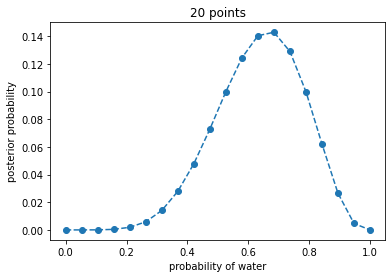

In [214]:
_, ax = plt.subplots()
ax.plot(p_grid, posterior, "o--")
ax.set_xlabel('probability of water')
ax.set_ylabel('posterior probability')
ax.set_title('20 points');

R code 2.5a equivalent

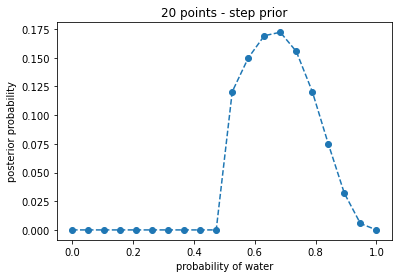

In [215]:
# define grid
grid_size = tf.constant(20)
p_grid = tf.linspace(start=0., stop=1., num=grid_size)
p_grid = tf.expand_dims(p_grid, 1)
# define prior
prior = tf.constant(np.expand_dims(np.array([0 if i < 0.5 else 1 for i in p_grid], dtype=np.float32), 1))
# compute likelihood at each value in grid
likelihood = tfd.Binomial(9, probs=p_grid).prob(6)
# compute product of likelihood and prior
unstd_posterior = likelihood * prior
# standardize the posterior, so it sums to 1
posterior = unstd_posterior / tf.math.reduce_sum(unstd_posterior)
# plot
_, ax = plt.subplots()
ax.plot(p_grid, posterior, "o--")
ax.set_xlabel('probability of water')
ax.set_ylabel('posterior probability')
ax.set_title('20 points - step prior');

R code 2.5b equivalent

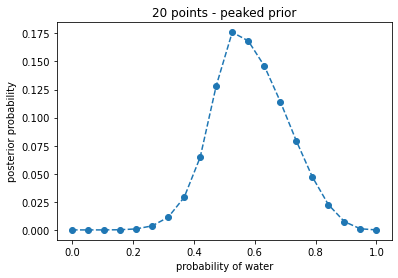

In [216]:
# define grid
grid_size = tf.constant(20)
p_grid = tf.linspace(start=0., stop=1., num=grid_size)
p_grid = tf.expand_dims(p_grid, 1)
# define prior
prior = tf.constant(tf.math.exp(-5 * tf.math.abs(p_grid - 0.5)))
# compute likelihood at each value in grid
likelihood = tf.math.exp(tfd.Binomial(9, probs=p_grid).log_prob(6))
# compute product of likelihood and prior
unstd_posterior = likelihood * prior
# standardize the posterior, so it sums to 1
posterior = unstd_posterior / tf.math.reduce_sum(unstd_posterior)
# plot
_, ax = plt.subplots()
ax.plot(p_grid, posterior, "o--")
ax.set_xlabel('probability of water')
ax.set_ylabel('posterior probability')
ax.set_title('20 points - peaked prior');

R code 2.6 equivalent

In [217]:
"""
Haven't done this since it requires an implementation of quadratic approximation (McElreath's quap())
It looks like the quap function will be used a lot, so I might try to rewrite it in tf/python

library(rethinking)
globe.qa <- quap(
alist(
W ~ dbinom( W+L ,p) , # binomial likelihood
p ~ dunif(0,1)
# uniform prior
) ,
data=list(W=6,L=3) )
# display summary of quadratic approximation
precis( globe.qa )
""";

R code 2.7 equivalent

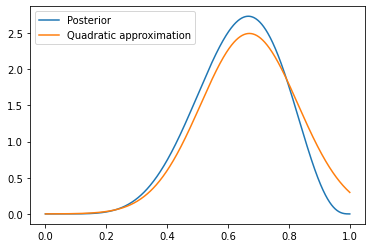

In [218]:
# analytical calculation
W = tf.constant(6.)
L = tf.constant(3.)

beta = tfd.Beta(W+1, L+1)
xrange = tf.linspace(0., 1., 1000)
y_beta = tf.math.exp(beta.log_prob(xrange))
_, ax = plt.subplots()
ax.plot(xrange, y_beta, label="Posterior")
# quadratic approximation
normal = tfd.Normal(0.67, 0.16)
y_norm = tf.math.exp(normal.log_prob(xrange))
ax.plot(xrange, y_norm, label="Quadratic approximation")
ax.legend();

R code 2.8 equivalent

In [219]:
n_samples = 1000
p = tf.Variable(tf.repeat(np.nan, n_samples), dtype=tf.float32)
p[0].assign(0.5)
W = tf.constant(6.)
L = tf.constant(3.)
rnd = tfd.Uniform(low=0.0, high=1.0)

for i in range(1, n_samples):
    p_new = tfd.Normal(p[i-1], 0.1).sample(1)
    p_new = tf.reshape(p_new, [])
    if p_new < 0.:
        p_new = tf.math.abs(p_new)
    if p_new > 1.:
        p_new = 2. - p_new
    binomials = tfd.Binomial(W+L, probs=[p[i-1], p_new])
    (q0, q1) = binomials.prob(W)
    if rnd.sample(1) < (q1 / q0):
        p[i].assign(p_new)
    else:
        p[i].assign(p[i-1])
     

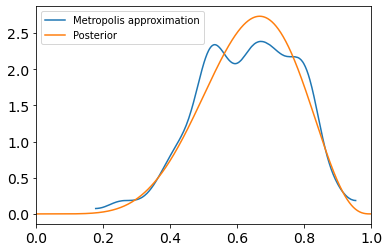

In [220]:
import arviz as az
xrange = tf.linspace(0., 1., n_samples)

_, ax = plt.subplots()
az.plot_kde(p.numpy(), label="Metropolis approximation")
ax.plot(xrange, tf.math.exp(tfd.Beta(W+1, L+1).log_prob(xrange)), "C1", label="Posterior")
ax.legend()
ax.set_xlim(0,1);